<a href="https://colab.research.google.com/github/carlosenciso/MACHINE_LEARNING/blob/master/Naive_Bayes_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><strong>Machine Learning 04. Bayes Naives</strong></center></h1>

# 1. Installing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [ ]:
!pip install geopandas
!pip install xarray 
!pip install rioxarray
!pip install cmocean
!pip install seaborn

# 2. Mount Drive
Mount remotely your google drive to get access into Dataset

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import cmocean as cmo
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 3. Reading Dataset Titanic surviver
Preprocess open dataset from titanic statistics

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/titanic.csv')
df = df.iloc[:,[2,3,4,-1]]
df = df.join(pd.get_dummies(df['Sex'], prefix=None), how='left')
target = df.iloc[:,[-3]]
inputs = df.iloc[:,[0,2,4,5]]

## 3.1. Is there any nan on inputs?

In [42]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [51]:
%%capture
inputs.loc[:,'Age'] = inputs.loc[:,'Age'].fillna(inputs.loc[:,'Age'].mean(skipna=True))

# 4. Import model

## 4.1. Split into train and test datasets

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target)

## 4.2. Call GaussianNB model

In [56]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
model.fit(X_train, y_train)

## 4.3. Verifying score model

In [58]:
model.score(X_test, y_test)

0.7802690582959642

## 4.4. Check out some outputs

In [ ]:
y_test.head(10)

In [ ]:
model.predict(X_test[:10])

In [ ]:
model.predict_proba(X_test[:10])

# 5. Inspect with heatmap

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.style.use('ggplot')
cm = confusion_matrix(y_test, model.predict(X_test))

Text(0.5, 1.0, 'Model skill')

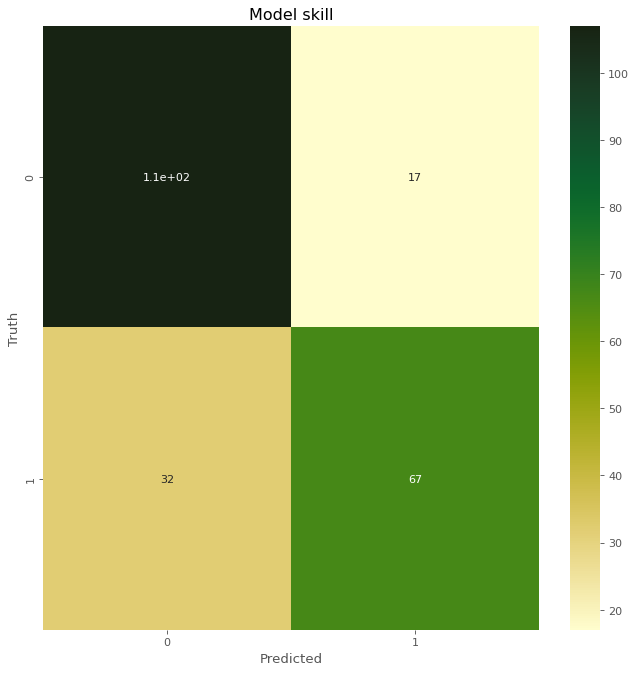

In [74]:
fig, ax = plt.subplots(figsize=(10,10), dpi=80)
sns.heatmap(cm, annot=True, ax=ax, cmap=cmo.cm.speed)
ax.set_ylabel('Truth')
ax.set_xlabel('Predicted')
ax.set_title('Model skill')